# K-Means Clustering


In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline

In [5]:
# Import dataset
df = pd.read_csv("/Users/payalparida/Desktop/Assessments-Term 2/CS5811/OnlineNewsPopularity_Final_Contineous.csv")
df.head(3)

,global_subjectivity,rate_negative_words,kw_avg_max,n_tokens_content,LDA_00,is_weekend,data_channel_is_entertainment,kw_max_avg,LDA_02,LDA_01,self_reference_min_shares,max_negative_polarity,kw_max_min,weekday_is_wednesday,weekday_is_tuesday,weekday_is_monday,shares
0,0.521617,0.230769,0.0,219,0.500331,0,1,0.0,0.040005,0.378279,496.0,-0.200000,0.0,0,0,1,593
1,0.341246,0.266667,0.0,255,0.799756,0,0,0.0,0.050096,0.050047,0.0,-0.100000,0.0,0,0,1,711
2,0.702222,0.142857,0.0,211,0.217792,0,0,0.0,0.033351,0.033334,918.0,-0.133333,0.0,0,0,1,1500


In [6]:
list(df.columns)

['global_subjectivity',
 'rate_negative_words',
 'kw_avg_max',
 'n_tokens_content',
 'LDA_00',
 'is_weekend',
 'data_channel_is_entertainment',
 'kw_max_avg',
 'LDA_02',
 'LDA_01',
 'self_reference_min_shares',
 'max_negative_polarity',
 'kw_max_min',
 'weekday_is_wednesday',
 'weekday_is_tuesday',
 'weekday_is_monday',
 'shares']

In [7]:
# Generate new data frame removing the sepcified variables

df_num = df.drop(["shares"],axis = 1)
list(df_num.columns)

['global_subjectivity',
 'rate_negative_words',
 'kw_avg_max',
 'n_tokens_content',
 'LDA_00',
 'is_weekend',
 'data_channel_is_entertainment',
 'kw_max_avg',
 'LDA_02',
 'LDA_01',
 'self_reference_min_shares',
 'max_negative_polarity',
 'kw_max_min',
 'weekday_is_wednesday',
 'weekday_is_tuesday',
 'weekday_is_monday']

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_num)
    sse.append(km.inertia_)

/Users/payalparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/payalparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/payalparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/payalparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

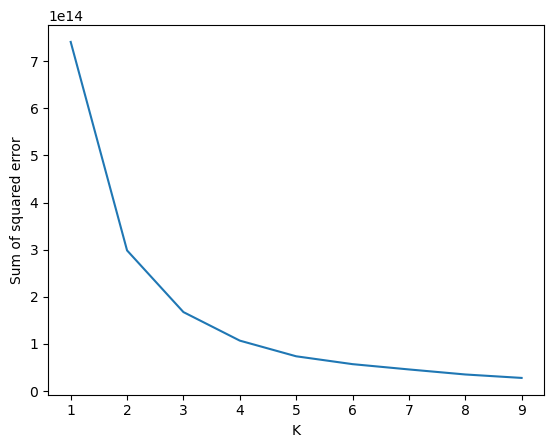

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)# Create a new dataframe to add the new cluster variable
df_num1 = df_num

In [10]:
# create a KMeans object with k=4
km = KMeans(n_clusters=4)

# fit the KMeans object to the dataset assigning to y_predicted
y_predicted = km.fit_predict(df_num)
y_predicted

/Users/payalparida/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 3, 0], dtype=int32)

In [11]:
# Create a new dataframe to add the new cluster variable
df_num_cluster = df_num

In [12]:
# Add the cluster value in new variable 'cluster' in the main dataset 'df1'

df_num_cluster['cluster']=y_predicted
df_num_cluster.head()

,global_subjectivity,rate_negative_words,kw_avg_max,n_tokens_content,LDA_00,is_weekend,data_channel_is_entertainment,kw_max_avg,LDA_02,LDA_01,self_reference_min_shares,max_negative_polarity,kw_max_min,weekday_is_wednesday,weekday_is_tuesday,weekday_is_monday,cluster
0,0.521617,0.230769,0.0,219,0.500331,0,1,0.0,0.040005,0.378279,496.0,-0.200000,0.0,0,0,1,1
1,0.341246,0.266667,0.0,255,0.799756,0,0,0.0,0.050096,0.050047,0.0,-0.100000,0.0,0,0,1,1
2,0.702222,0.142857,0.0,211,0.217792,0,0,0.0,0.033351,0.033334,918.0,-0.133333,0.0,0,0,1,1
3,0.429850,0.333333,0.0,531,0.028573,0,1,0.0,0.494651,0.419300,0.0,-0.166667,0.0,0,0,1,1
4,0.513502,0.139785,0.0,1072,0.028633,0,0,0.0,0.028575,0.028794,545.0,-0.050000,0.0,0,0,1,1


In [13]:
#gives predicted class labels (cluster) for each data point
km.labels_

array([1, 1, 1, ..., 0, 3, 0], dtype=int32)

### Check the total count of observation belongs to specific cluster


In [21]:
Counter(km.labels_)

Counter({1: 6015, 3: 17418, 2: 4153, 0: 12058})

## Visualization of Clustering

In [20]:
pca_num_components = 2

In [15]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_num_cluster)
reduced_data

array([[-259330.76500352,   -1543.21221213],
       [-259334.72753195,   -2039.05773233],
       [-259327.40127238,   -1121.35748422],
       ...,
       [  36553.67516322,   -2865.66840236],
       [  -4723.19292135,   -3569.10670514],
       [ 106885.63439102,   -2821.10075007]])

In [17]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results

,pca1,pca2
0,-259330.765004,-1543.212212
1,-259334.727532,-2039.057732
2,-259327.401272,-1121.357484
3,-259334.820398,-2039.226544
4,-259330.661748,-1494.751373
...,...,...
39639,115723.581391,6416.385366
39640,-66308.458965,-1366.599271
39641,36553.675163,-2865.668402
39642,-4723.192921,-3569.106705


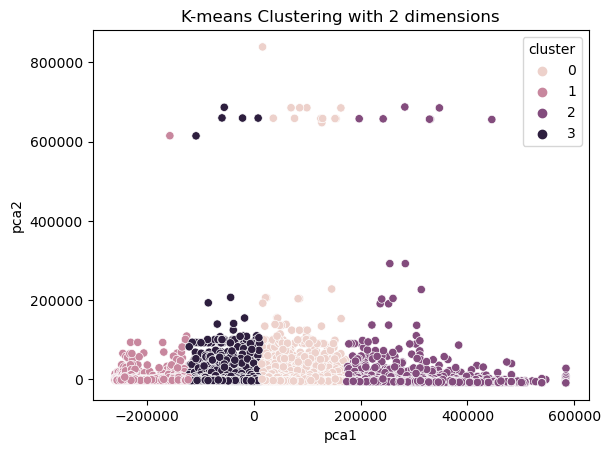

In [18]:
sns.scatterplot(x="pca1", y="pca2", hue=df_num['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()